# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
import pandas as pd
import numpy as np

# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [6]:
employees = pd.read_csv('Employee (2).csv')

In [7]:
employees.head(60)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [11]:
employees.isnull().sum()

Name          0
Department    0
Education     0
Gender        0
Title         0
Years         0
Salary        0
dtype: int64

In [170]:
employees['Title'].value_counts()

analyst      4
associate    3
VP           2
Name: Title, dtype: int64

#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [145]:
# Method 1
employees.groupby('Department')['Salary'].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [146]:
# Method 2
employees.pivot_table(values='Salary', index='Department', aggfunc='mean')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [147]:
employees.pivot_table(values='Salary', index=['Department', 'Title'], aggfunc='mean')

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [18]:
employees.pivot_table(index=['Department', 'Title'],  values=['Salary','Years'], aggfunc='mean')

Salary  Years
Department Title                   
HR         VP           70.0    8.0
           analyst      32.5    3.0
IT         VP           70.0    8.0
           analyst      32.5    1.5
           associate    60.0    7.0
Sales      associate    55.0    2.5

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [149]:
employees.pivot_table(values=['Title', 'Salary'], index=['Department'], aggfunc={'Salary':'mean', 'Title': lambda x: len(x) })

,Salary,Title
Department,,
HR,45.00,3
IT,48.75,4
Sales,55.00,2


#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [14]:
employees.pivot_table(values=['Salary'], index=['Department', 'Title'], aggfunc='describe')

Salary                                               
                        25%   50%    75% count   max  mean   min       std
Department Title                                                          
HR         VP         70.00  70.0  70.00   1.0  70.0  70.0  70.0       NaN
           analyst    31.25  32.5  33.75   2.0  35.0  32.5  30.0  3.535534
IT         VP         70.00  70.0  70.00   1.0  70.0  70.0  70.0       NaN
           analyst    31.25  32.5  33.75   2.0  35.0  32.5  30.0  3.535534
           associate  60.00  60.0  60.00   1.0  60.0  60.0  60.0       NaN
Sales      associate  55.00  55.0  55.00   2.0  55.0  55.0  55.0  0.000000

In [13]:
"""
Salaries between departments and titles look pretty similar in all cases. 

"""

'\nSalaries between departments and titles look pretty similar in all cases. \n\n'

#### Based on your comments, fill the missing values with an appropriate value.

In [152]:
employees.isna().sum()

Name          0
Department    0
Education     0
Gender        0
Title         0
Years         0
Salary        0
dtype: int64

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [153]:
employees.pivot_table(values=['Salary', 'Title'], index='Department', aggfunc={'Title': lambda x: len(x), 'Salary':'sum'})

,Salary,Title
Department,,
HR,135,3
IT,195,4
Sales,110,2


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [16]:
employees.pivot_table(values=['Years', 'Salary'], index=['Department', 'Title'], aggfunc= {'Years': 'sum', 'Salary': 'mean'})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [155]:
employees.groupby(['Department'], sort=False)['Salary'].max()

Department
IT       70
HR       70
Sales    55
Name: Salary, dtype: int64

In [156]:
idx = employees.groupby(['Department'])['Salary'].transform(max) == employees['Salary']

In [75]:
employees.drop(employees[idx].index, inplace=True)

In [76]:
employees.pivot_table(values=['Salary'], index=['Department'])

,Salary
Department,
Admin,75.603306
HR,73.109244
IT,70.300752
Sales,71.940678


# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [77]:
fitbit = pd.read_csv('Fitbit2.csv')

#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [80]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [81]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        367 non-null    object 
 1   Calorie burned              367 non-null    int64  
 2   Steps                       367 non-null    int64  
 3   Distance                    367 non-null    float64
 4   Floors                      367 non-null    int64  
 5   Minutes Sedentary           367 non-null    float64
 6   Minutes Lightly Active      367 non-null    int64  
 7   Minutes Fairly Active       367 non-null    int64  
 8   Minutes Very Active         367 non-null    int64  
 9   Activity Calories           367 non-null    int64  
 10  MinutesOfSleep              367 non-null    int64  
 11  MinutesOfBeingAwake         367 non-null    int64  
 12  NumberOfAwakings            367 non-null    int64  
 13  LengthOfRestInMinutes       367 non

In [82]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,...,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months_encoded
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,...,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,...,16.196185,321.343324,5.312180,3.010899,0.713896,4.841326,76.362799,4.818529,76.119842,6.501362
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,...,10.757622,170.786726,2.118801,1.998604,0.452555,2.579205,32.973194,2.584930,33.206279,3.459267
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,...,7.000000,248.000000,3.824539,1.000000,0.000000,3.733333,86.238532,3.725000,86.233673,3.500000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,...,16.000000,370.000000,5.151166,3.000000,1.000000,5.616667,89.433962,5.600000,89.433962,7.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,...,24.000000,440.500000,6.561678,5.000000,1.000000,6.675000,92.438419,6.650000,92.438419,9.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,...,45.000000,607.000000,12.707037,6.000000,1.000000,9.216667,100.000000,9.216667,100.000000,12.000000


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [84]:
fitbit.corrwith(fitbit['Minutes Very Active']).sort_values()

Activity Calories            -0.187309
Days_encoded                 -0.111718
Months_encoded               -0.085153
Minutes Lightly Active       -0.034425
Yesterday_sleep_efficiency    0.073853
NumberOfAwakings              0.099859
Work_or_Weekend               0.103940
Minutes Sedentary             0.105963
Sleep efficiency              0.106693
MinutesOfSleep                0.108018
Hours Sleep                   0.108018
LengthOfRestInMinutes         0.115641
MinutesOfBeingAwake           0.116559
Yesterday_sleep               0.120500
Calorie burned                0.197881
Minutes Fairly Active         0.337839
Floors                        0.399503
Steps                         0.571452
Distance                      0.759310
Distance_miles                0.759310
Minutes Very Active           1.000000
dtype: float64

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [85]:
import matplotlib.pyplot as plt;

In [90]:
%matplotlib inline



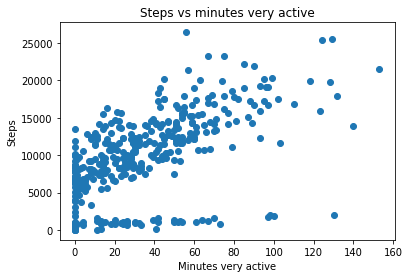

In [91]:

plt.scatter(fitbit['Minutes Very Active'], fitbit['Steps'] )
plt.title('Steps vs minutes very active')
plt.xlabel('Minutes very active')
plt.ylabel('Steps')
plt.show()

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
There is a linear correlation but the outliers show that its only about 57%

"""

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [94]:
fitbit.corrwith(fitbit['Minutes Sedentary']).sort_values()

Activity Calories            -0.161446
Months_encoded               -0.107068
Days_encoded                 -0.069168
Floors                        0.057812
Yesterday_sleep_efficiency    0.058520
Yesterday_sleep               0.069396
Work_or_Weekend               0.071185
Steps                         0.076906
Minutes Fairly Active         0.084137
Minutes Very Active           0.105963
Calorie burned                0.125353
Distance_miles                0.160632
Distance                      0.160632
NumberOfAwakings              0.178387
MinutesOfBeingAwake           0.200589
MinutesOfSleep                0.204242
Hours Sleep                   0.204242
LengthOfRestInMinutes         0.208539
Minutes Lightly Active        0.217021
Sleep efficiency              0.251996
Minutes Sedentary             1.000000
dtype: float64

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

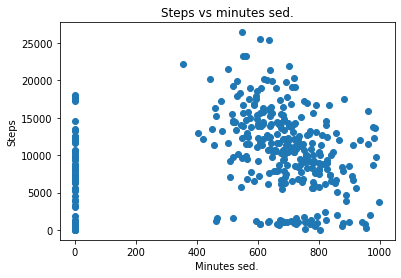

In [95]:
plt.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'] )
plt.title('Steps vs minutes sed.')
plt.xlabel('Minutes sed.')
plt.ylabel('Steps')
plt.show()

In [96]:
"""
There is negative correlation but only in about half of the dataset.
"""

'\nThere is negative correlation but only in about half of the dataset.\n'

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [97]:
fitbit.corrwith(fitbit['MinutesOfSleep']).sort_values()

Months_encoded               -0.127980
Days_encoded                 -0.033913
Activity Calories            -0.005804
Calorie burned                0.011485
Floors                        0.069464
Work_or_Weekend               0.094152
Yesterday_sleep_efficiency    0.095999
Minutes Lightly Active        0.105048
Minutes Very Active           0.108018
Minutes Fairly Active         0.114950
Distance                      0.129442
Distance_miles                0.129442
Steps                         0.130986
Yesterday_sleep               0.148113
Minutes Sedentary             0.204242
MinutesOfBeingAwake           0.779595
NumberOfAwakings              0.780512
Sleep efficiency              0.807964
LengthOfRestInMinutes         0.997184
MinutesOfSleep                1.000000
Hours Sleep                   1.000000
dtype: float64

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

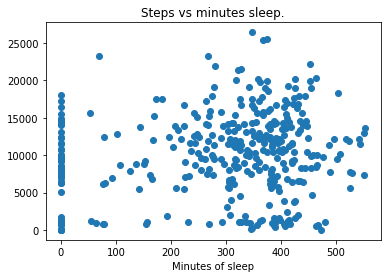

In [99]:
plt.scatter(fitbit['MinutesOfSleep'], fitbit['Steps'] )
plt.title('Steps vs minutes sleep.')
plt.xlabel('Minutes of sleep')
plt.show()

In [100]:
"""
Very similar correlation to the sedentary part but this is positive.
"""

'\nVery similar correlation to the sedentary part but this is positive.\n'

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [101]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [106]:
corr_fit = fitbit[columns].corr()

In [107]:
corr_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [110]:
corr_fit['Steps'].sort_values()

Minutes Sedentary      0.076906
MinutesOfSleep         0.130986
Calorie burned         0.255305
Floors                 0.306511
Minutes Very Active    0.571452
Steps                  1.000000
Name: Steps, dtype: float64

In [111]:
#Minutes Very Active

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [19]:
df = pd.read_csv('Time_Grades.csv')

#### Show visually the frequency distribution of the `time_grades` dataset.

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
df.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


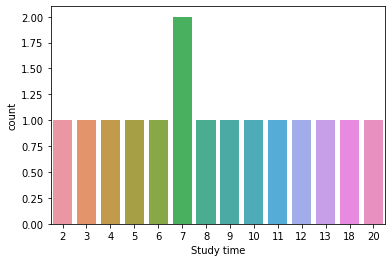

In [40]:
sns.countplot(x=df['Study time'])

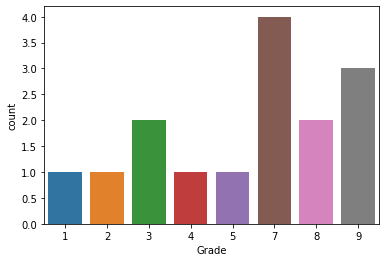

In [41]:
sns.countplot(df['Grade'])

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [28]:
df.corr()

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [31]:
df.corr(method='spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


In [32]:
"""
Seems like pretty linear correlation between them.
"""

'\nSeems like pretty linear correlation between them.\n'

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

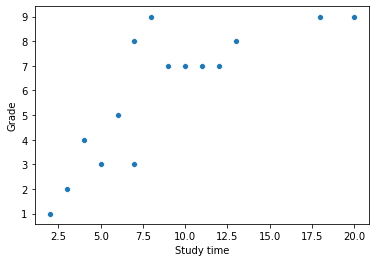

In [42]:
sns.scatterplot(df['Study time'], df['Grade'])

In [ ]:
"""
The two are highly correlated. Sigmoid-like.

"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [44]:
"""
The Pearson correlation evaluates the linear relationship between two continuous variables.
The Spearman correlation evaluates the monotonic relationship between two continuous or ordinal variables. In a monotonic relationship, the variables tend to change together, but not necessarily at a constant rate.
The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.

the Pearson is most appropriate for measurements taken from an interval scale, while the Spearman is more appropriate for measurements taken from ordinal scales.
"""

'\nThe Pearson correlation evaluates the linear relationship between two continuous variables.\nThe Spearman correlation evaluates the monotonic relationship between two continuous or ordinal variables. In a monotonic relationship, the variables tend to change together, but not necessarily at a constant rate.\nThe Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.\n\nthe Pearson is most appropriate for measurements taken from an interval scale, while the Spearman is more appropriate for measurements taken from ordinal scales.\n'